# Connect with Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Required Libraries

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.callbacks import ModelCheckpoint

import cv2
import os

import matplotlib.pyplot as plt
import numpy as np

import random
import pickle

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


# Input Data Sample

Imput Pickled Data
--

In [3]:
pickle_in = open("/content/drive/MyDrive/Meta-Heuristics/Project Works/Datasets/Pickle Data/X.pickle", "rb")
X = pickle.load(pickle_in)
 
pickle_in = open("/content/drive/MyDrive/Meta-Heuristics/Project Works/Datasets/Pickle Data/Y.pickle", "rb")
Y = pickle.load(pickle_in)

In [4]:
print('Data: ', len(X), len(Y))

Data:  450 450


Split Data into Train, Test and Validation Sets
--

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.333, random_state=1) #33.3% data as test and validation data

X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size=0.50, random_state=1) #16.7% data as test and 10% as validation data

In [ ]:
print('Train:', len(X_train), len(Y_train), '\nTest: ', len(X_test), len(Y_test), '\nValidation: ', len(X_val), len(Y_val))

Train: 300 300 
Test:  75 75 
Validation:  75 75


Sample Data - Train Dataset
--

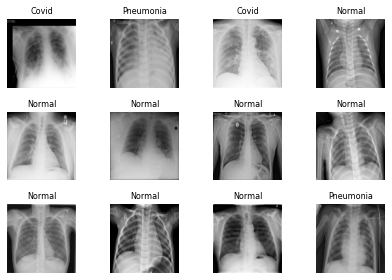

In [ ]:
def display_multiple_img(images, rows = 1, cols=1):
    figure, ax = plt.subplots(nrows=rows,ncols=cols )
    for ind,title in enumerate(images):
        ax.ravel()[ind].imshow(images[title])
        ax.ravel()[ind].set_title(title[:-2], fontsize=8)
        ax.ravel()[ind].set_axis_off()
    plt.tight_layout()
    plt.show()

Classes = ["Covid", "Normal", "Pneumonia"]

images = {str(Classes[Y_train[i]])+format(str(i).zfill(2)): X_train[i] for i in range(12)}

display_multiple_img(images, 3, 4)

# Model Uses for Classification

In [ ]:
model = keras.applications.VGG16(include_top=False, weights='imagenet', input_shape=(224,224,3))

58900480/58889256 [==============================] - 0s 0us/step


# Add Top Layers

In [ ]:
inputs = model.layers[0].input

add_layer = model.layers[-1].output
add_layer = layers.Dense(128)(add_layer)
add_layer = layers.Activation('relu')(add_layer)
add_layer = layers.Dense(64)(add_layer)
add_layer = layers.Activation('relu')(add_layer)
add_layer = layers.GlobalAveragePooling2D()(add_layer)
outputs = layers.Dense(3, activation='softmax')(add_layer)

model = keras.Model(inputs, outputs)

In [ ]:
from keras.utils.layer_utils import count_params

model.compile(
      loss = "sparse_categorical_crossentropy",
      optimizer = "adam",
      metrics = ["accuracy"],
  )

trainable_count = count_params(model.trainable_weights)
non_trainable_count = count_params(model.non_trainable_weights)

print("Total: ", trainable_count+non_trainable_count, " Trainable: ", trainable_count, " Non-Trainable: ", non_trainable_count)

Total:  14788803  Trainable:  14788803  Non-Trainable:  0


In [ ]:
import random
for layer in model.layers:
  n = random.random()
  if(n>0.5):
    layer.trainable = False

from keras.utils.layer_utils import count_params

model.compile(
      loss = "sparse_categorical_crossentropy",
      optimizer = "adam",
      metrics = ["accuracy"],
  )

trainable_count = count_params(model.trainable_weights)
non_trainable_count = count_params(model.non_trainable_weights)

print("Total: ", trainable_count+non_trainable_count, " Trainable: ", trainable_count, " Non-Trainable: ", non_trainable_count)

Total:  14788803  Trainable:  9300867  Non-Trainable:  5487936


# Compile and Train

In [ ]:
model.compile(
        loss = "sparse_categorical_crossentropy",
        optimizer = "adam",
        metrics = ["accuracy"],
    )

filepath = '/content/drive/MyDrive/Meta-Heuristics/Project Works/Datasets/Pickle Data/TL-Models/model-{epoch:02d}-performance-{val_accuracy:.2f}-{val_loss:.2f}.hdf5'

checkpoint_acc = ModelCheckpoint(filepath=filepath, 
                             monitor='val_accuracy',
                             verbose=1, 
                             save_best_only=True,
                             mode='max')

checkpoint_loss = ModelCheckpoint(filepath=filepath, 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')

callbacks = [checkpoint_acc, checkpoint_loss]

epochs = 300
model_records = model.fit(X_train, Y_train, epochs=epochs, validation_data=(X_val, Y_val), callbacks=callbacks)


Epoch 1/300
10/10 [==============================] - ETA: 0s - loss: 1.1042 - accuracy: 0.2933
Epoch 1: val_accuracy improved from -inf to 0.28000, saving model to /content/drive/MyDrive/Meta-Heuristics/Project Works/Datasets/Pickle Data/TL-Models/model-01-performance-0.28-1.10.hdf5

Epoch 1: val_loss improved from inf to 1.10085, saving model to /content/drive/MyDrive/Meta-Heuristics/Project Works/Datasets/Pickle Data/TL-Models/model-01-performance-0.28-1.10.hdf5
10/10 [==============================] - 11s 899ms/step - loss: 1.1042 - accuracy: 0.2933 - val_loss: 1.1008 - val_accuracy: 0.2800
Epoch 2/300
10/10 [==============================] - ETA: 0s - loss: 1.0676 - accuracy: 0.3500
Epoch 2: val_accuracy did not improve from 0.28000

Epoch 2: val_loss improved from 1.10085 to 1.05749, saving model to /content/drive/MyDrive/Meta-Heuristics/Project Works/Datasets/Pickle Data/TL-Models/model-02-performance-0.28-1.06.hdf5
10/10 [==============================] - 8s 814ms/step - loss: 1

# Learning Visualization

Text(0.5, 1.0, 'Training and Validation Accuracies')

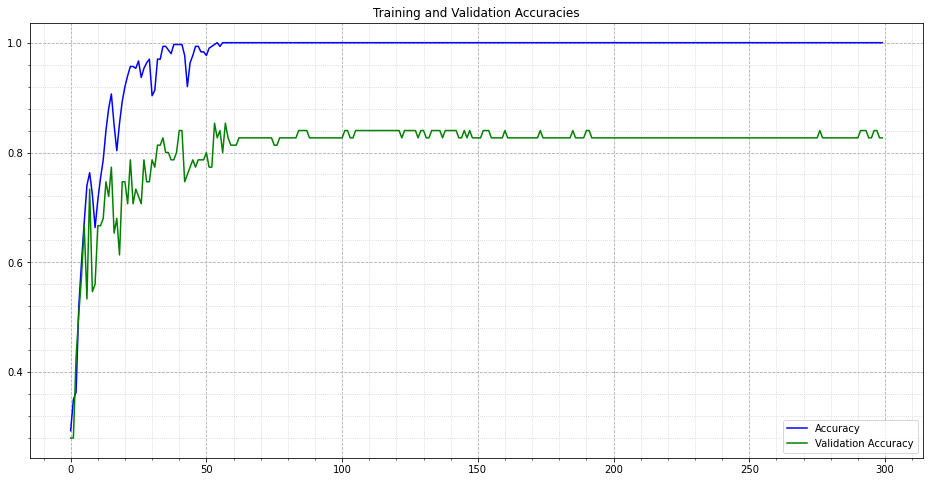

In [ ]:
acc_histories = model_records.history['accuracy']
val_acc_histories = model_records.history['val_accuracy']
plt_range = np.arange(0, 300, 1)

#from itertools import chain
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

#plt.figure(figsize=(16, 8))
fig, ax = plt.subplots(figsize=(16, 8))
# plt.plot(plt_range, list(chain.from_iterable(acc_histories)), label='Accuracy')
# plt.plot(plt_range, list(chain.from_iterable(val_acc_histories)), label='Validation Accuracy')
plt.plot(plt_range, acc_histories, label='Accuracy', color="blue")
plt.plot(plt_range, val_acc_histories, label='Validation Accuracy', color="green")



# Change major ticks to show every .10.
ax.xaxis.set_major_locator(MultipleLocator(50))
ax.yaxis.set_major_locator(MultipleLocator(.20))

# Change minor ticks to show every 10. (10/1 = 10)
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))

# Turn grid on for both major and minor ticks and style minor slightly
# differently.
ax.grid(which='major', color='#ACACAC', linestyle='--')
ax.grid(which='minor', color='#CCCCCC', linestyle=':')

#plt.grid(True)
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracies')

Text(0.5, 1.0, 'Training and Validation Log Losses')

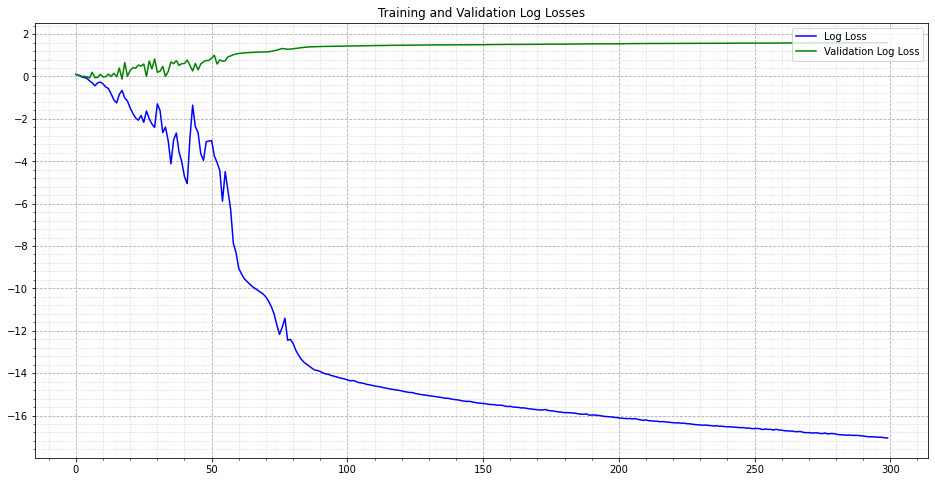

In [ ]:
plt_range = range(300)

loss_histories = model_records.history['loss']
val_loss_histories = model_records.history['val_loss']

#from itertools import chain
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
import numpy as np

#plt.figure(figsize=(16, 8))
fig, ax = plt.subplots(figsize=(16, 8))

plt.plot(plt_range, np.log(loss_histories), label='Log Loss', color="blue")
plt.plot(plt_range, np.log(val_loss_histories), label='Validation Log Loss', color="green")



# Change major ticks to show every .10.
ax.xaxis.set_major_locator(MultipleLocator(50))
ax.yaxis.set_major_locator(MultipleLocator(2))

# Change minor ticks to show every 10. (10/1 = 10)
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))

# Turn grid on for both major and minor ticks and style minor slightly
# differently.
ax.grid(which='major', color='#ACACAC', linestyle='--')
ax.grid(which='minor', color='#CCCCCC', linestyle=':')

#plt.grid(True)
plt.legend(loc='upper right')
plt.title('Training and Validation Log Losses')

# Performance Measures

In [10]:
tl_model = tf.keras.models.load_model('/content/drive/MyDrive/Meta-Heuristics/Project Works/Datasets/Pickle Data/TL-Models/model-54-performance-0.85-2.18.hdf5')

In [11]:
predictions = tl_model.predict(X_test) # predict output for all test data

scores = tf.nn.softmax(predictions)
Y_pred = []
for score in scores:
  Y_pred.append(np.argmax(score))
Y_pred = np.array(Y_pred) # predicted labels

In [12]:
Y_true = Y_test # true labels

In [13]:
# Defining function for confusion matrix plot
def plot_confusion_matrix(Y_true, Y_pred, Classes, normalize=False, title=None, cmap=plt.cm.Blues):

    # Compute the confusion matrix
    conf_mat = confusion_matrix(Y_true, Y_pred)
    if normalize:
        conf_mat = conf_mat.astype('float32') / conf_mat.sum(axis=1)[:, np.newaxis]
        print(title)
    else:
        print(title)

    fig, ax = plt.subplots(figsize=(6,6))
    im = ax.imshow(conf_mat, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)

    # We want to show all ticks...
    ax.set(xticks=np.arange(conf_mat.shape[1]), yticks=np.arange(conf_mat.shape[0]),
           xticklabels=Classes, yticklabels=Classes,
           title=title, ylabel='True label', xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
   
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = conf_mat.max() / 2.
    for i in range(conf_mat.shape[0]):
        for j in range(conf_mat.shape[1]):
            ax.text(j, i, format(conf_mat[i, j], fmt),
                    ha="center", va="center",
                    color="white" if conf_mat[i, j] > thresh else "black")
    fig.tight_layout()

    return ax

np.set_printoptions(precision=2)

Confusion Matrix


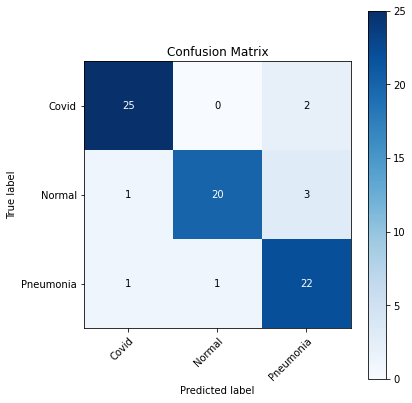

In [14]:
from sklearn.metrics import confusion_matrix

#Plotting the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred)

#Defining the class labels again
Classes = ["Covid", "Normal", "Pneumonia"]

# Plotting non-normalized confusion matrix
plot_confusion_matrix(Y_true, Y_pred, Classes = Classes, title='Confusion Matrix')

Confusion Matrix - Normalized


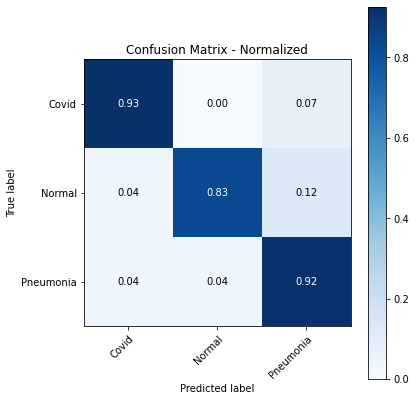

In [15]:
#Plotting normalized confusion matrix
plot_confusion_matrix(Y_true, Y_pred, Classes = Classes, normalize = True, title = 'Confusion Matrix - Normalized')

In [ ]:
tl_records = tl_model.evaluate(X_test, Y_test)

3/3 [==============================] - 1s 261ms/step - loss: 0.8167 - accuracy: 0.8933


In [ ]:
Classes = ["Covid", "Normal", "Pneumonia"]

from sklearn import metrics

def get_metrics(true_labels, predicted_labels):
  print('Accuracy:', np.round(metrics.accuracy_score(true_labels, predicted_labels), 4))
  print('Precision:', np.round(metrics.precision_score(true_labels, predicted_labels, average='weighted'),4))
  print('Recall:', np.round(metrics.recall_score(true_labels, predicted_labels, average='weighted'), 4))
  print('F1 Score:', np.round(metrics.f1_score(true_labels, predicted_labels, average='weighted'), 4))

get_metrics(Y_true, Y_pred)
  
def display_classification_report(true_labels, predicted_labels, Classes):
  report = metrics.classification_report(y_true=true_labels, y_pred=predicted_labels, target_names=Classes)
  print("\nReport:\n"+report)

display_classification_report(Y_true, Y_pred, Classes)

Accuracy: 0.8933
Precision: 0.8988
Recall: 0.8933
F1 Score: 0.8939

Report:
              precision    recall  f1-score   support

       Covid       0.93      0.93      0.93        27
      Normal       0.95      0.83      0.89        24
   Pneumonia       0.81      0.92      0.86        24

    accuracy                           0.89        75
   macro avg       0.90      0.89      0.89        75
weighted avg       0.90      0.89      0.89        75



ROC AUC score: 0.9194353667392883


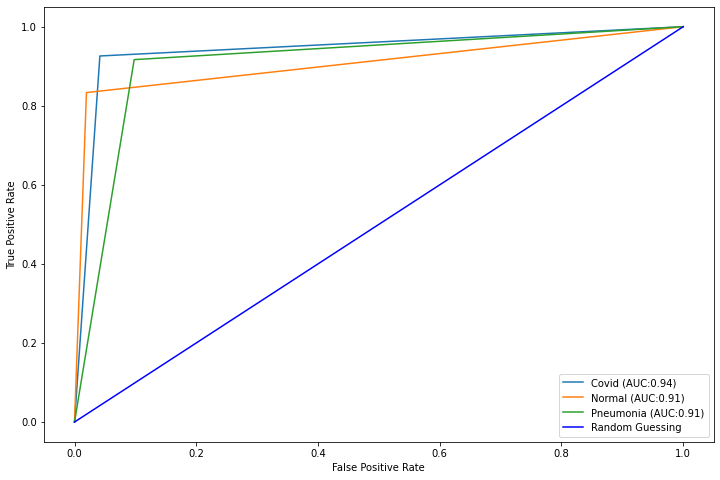

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score

target= Classes

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
  lb = LabelBinarizer()
  lb.fit(y_test)
  y_test = lb.transform(y_test)
  y_pred = lb.transform(y_pred)
  
  for (idx, c_label) in enumerate(target):
    fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)' % (c_label, auc(fpr, tpr)))
  
  c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
  return roc_auc_score(y_test, y_pred, average=average)

print('ROC AUC score:', multiclass_roc_auc_score(Y_test, Y_pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

# Performance Measures - 2


In [16]:
tl_model = tf.keras.models.load_model('/content/drive/MyDrive/Meta-Heuristics/Project Works/Datasets/Pickle Data/TL-Models/model-41-performance-0.84-1.84.hdf5')

In [17]:
predictions = tl_model.predict(X_test) # predict output for all test data

scores = tf.nn.softmax(predictions)
Y_pred = []
for score in scores:
  Y_pred.append(np.argmax(score))
Y_pred = np.array(Y_pred) # predicted labels

In [18]:
Y_true = Y_test # true labels

In [19]:
# Defining function for confusion matrix plot
def plot_confusion_matrix(Y_true, Y_pred, Classes, normalize=False, title=None, cmap=plt.cm.Blues):

    # Compute the confusion matrix
    conf_mat = confusion_matrix(Y_true, Y_pred)
    if normalize:
        conf_mat = conf_mat.astype('float32') / conf_mat.sum(axis=1)[:, np.newaxis]
        print(title)
    else:
        print(title)

    fig, ax = plt.subplots(figsize=(6,6))
    im = ax.imshow(conf_mat, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)

    # We want to show all ticks...
    ax.set(xticks=np.arange(conf_mat.shape[1]), yticks=np.arange(conf_mat.shape[0]),
           xticklabels=Classes, yticklabels=Classes,
           title=title, ylabel='True label', xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
   
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = conf_mat.max() / 2.
    for i in range(conf_mat.shape[0]):
        for j in range(conf_mat.shape[1]):
            ax.text(j, i, format(conf_mat[i, j], fmt),
                    ha="center", va="center",
                    color="white" if conf_mat[i, j] > thresh else "black")
    fig.tight_layout()

    return ax

np.set_printoptions(precision=2)

Confusion Matrix


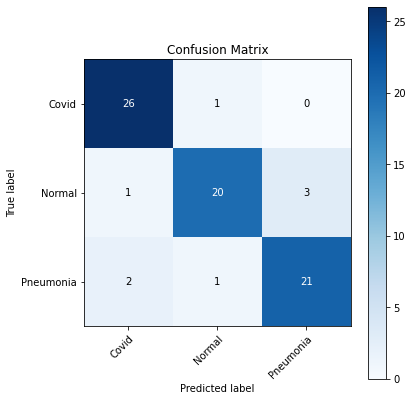

In [20]:
from sklearn.metrics import confusion_matrix

#Plotting the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred)

#Defining the class labels again
Classes = ["Covid", "Normal", "Pneumonia"]

# Plotting non-normalized confusion matrix
plot_confusion_matrix(Y_true, Y_pred, Classes = Classes, title='Confusion Matrix')

Confusion Matrix - Normalized


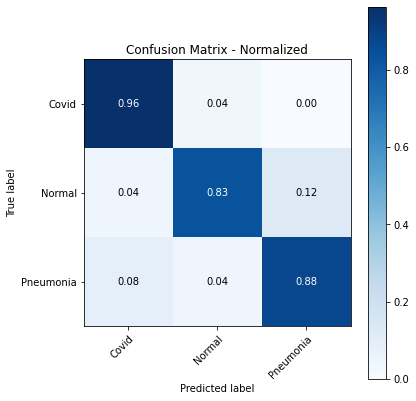

In [21]:
#Plotting normalized confusion matrix
plot_confusion_matrix(Y_true, Y_pred, Classes = Classes, normalize = True, title = 'Confusion Matrix - Normalized')

In [ ]:
tl_records = tl_model.evaluate(X_test, Y_test)

3/3 [==============================] - 1s 260ms/step - loss: 0.7285 - accuracy: 0.8933


In [ ]:
Classes = ["Covid", "Normal", "Pneumonia"]

from sklearn import metrics

def get_metrics(true_labels, predicted_labels):
  print('Accuracy:', np.round(metrics.accuracy_score(true_labels, predicted_labels), 4))
  print('Precision:', np.round(metrics.precision_score(true_labels, predicted_labels, average='weighted'),4))
  print('Recall:', np.round(metrics.recall_score(true_labels, predicted_labels, average='weighted'), 4))
  print('F1 Score:', np.round(metrics.f1_score(true_labels, predicted_labels, average='weighted'), 4))

get_metrics(Y_true, Y_pred)
  
def display_classification_report(true_labels, predicted_labels, Classes):
  report = metrics.classification_report(y_true=true_labels, y_pred=predicted_labels, target_names=Classes)
  print("\nReport:\n"+report)

display_classification_report(Y_true, Y_pred, Classes)

Accuracy: 0.8933
Precision: 0.8937
Recall: 0.8933
F1 Score: 0.8925

Report:
              precision    recall  f1-score   support

       Covid       0.90      0.96      0.93        27
      Normal       0.91      0.83      0.87        24
   Pneumonia       0.88      0.88      0.88        24

    accuracy                           0.89        75
   macro avg       0.89      0.89      0.89        75
weighted avg       0.89      0.89      0.89        75



ROC AUC score: 0.9184595134350036


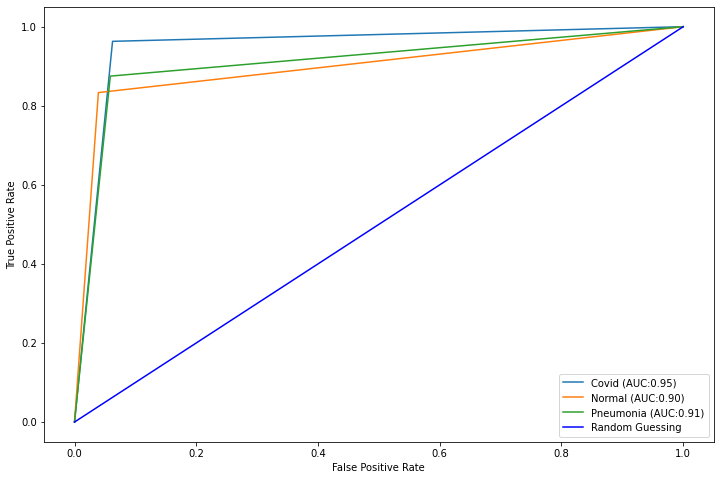

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score

target= Classes

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
  lb = LabelBinarizer()
  lb.fit(y_test)
  y_test = lb.transform(y_test)
  y_pred = lb.transform(y_pred)
  
  for (idx, c_label) in enumerate(target):
    fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)' % (c_label, auc(fpr, tpr)))
  
  c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
  return roc_auc_score(y_test, y_pred, average=average)

print('ROC AUC score:', multiclass_roc_auc_score(Y_test, Y_pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

# Performance Measures - 3


In [22]:
tl_model = tf.keras.models.load_model('/content/drive/MyDrive/Meta-Heuristics/Project Works/Datasets/Pickle Data/TL-Models/model-35-performance-0.83-1.27.hdf5')

In [23]:
predictions = tl_model.predict(X_test) # predict output for all test data

scores = tf.nn.softmax(predictions)
Y_pred = []
for score in scores:
  Y_pred.append(np.argmax(score))
Y_pred = np.array(Y_pred) # predicted labels

In [24]:
Y_true = Y_test # true labels

In [25]:
# Defining function for confusion matrix plot
def plot_confusion_matrix(Y_true, Y_pred, Classes, normalize=False, title=None, cmap=plt.cm.Blues):

    # Compute the confusion matrix
    conf_mat = confusion_matrix(Y_true, Y_pred)
    if normalize:
        conf_mat = conf_mat.astype('float32') / conf_mat.sum(axis=1)[:, np.newaxis]
        print(title)
    else:
        print(title)

    fig, ax = plt.subplots(figsize=(6,6))
    im = ax.imshow(conf_mat, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)

    # We want to show all ticks...
    ax.set(xticks=np.arange(conf_mat.shape[1]), yticks=np.arange(conf_mat.shape[0]),
           xticklabels=Classes, yticklabels=Classes,
           title=title, ylabel='True label', xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
   
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = conf_mat.max() / 2.
    for i in range(conf_mat.shape[0]):
        for j in range(conf_mat.shape[1]):
            ax.text(j, i, format(conf_mat[i, j], fmt),
                    ha="center", va="center",
                    color="white" if conf_mat[i, j] > thresh else "black")
    fig.tight_layout()

    return ax

np.set_printoptions(precision=2)

Confusion Matrix


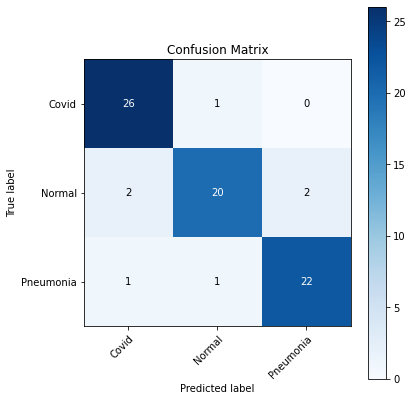

In [26]:
from sklearn.metrics import confusion_matrix

#Plotting the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred)

#Defining the class labels again
Classes = ["Covid", "Normal", "Pneumonia"]

# Plotting non-normalized confusion matrix
plot_confusion_matrix(Y_true, Y_pred, Classes = Classes, title='Confusion Matrix')

Confusion Matrix - Normalized


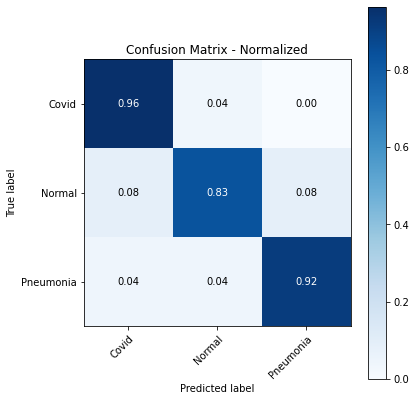

In [27]:
#Plotting normalized confusion matrix
plot_confusion_matrix(Y_true, Y_pred, Classes = Classes, normalize = True, title = 'Confusion Matrix - Normalized')

In [ ]:
tl_records = tl_model.evaluate(X_test, Y_test)

3/3 [==============================] - 1s 258ms/step - loss: 0.4753 - accuracy: 0.9067


In [ ]:
Classes = ["Covid", "Normal", "Pneumonia"]

from sklearn import metrics

def get_metrics(true_labels, predicted_labels):
  print('Accuracy:', np.round(metrics.accuracy_score(true_labels, predicted_labels), 4))
  print('Precision:', np.round(metrics.precision_score(true_labels, predicted_labels, average='weighted'),4))
  print('Recall:', np.round(metrics.recall_score(true_labels, predicted_labels, average='weighted'), 4))
  print('F1 Score:', np.round(metrics.f1_score(true_labels, predicted_labels, average='weighted'), 4))

get_metrics(Y_true, Y_pred)
  
def display_classification_report(true_labels, predicted_labels, Classes):
  report = metrics.classification_report(y_true=true_labels, y_pred=predicted_labels, target_names=Classes)
  print("\nReport:\n"+report)

display_classification_report(Y_true, Y_pred, Classes)

Accuracy: 0.9067
Precision: 0.907
Recall: 0.9067
F1 Score: 0.9059

Report:
              precision    recall  f1-score   support

       Covid       0.90      0.96      0.93        27
      Normal       0.91      0.83      0.87        24
   Pneumonia       0.92      0.92      0.92        24

    accuracy                           0.91        75
   macro avg       0.91      0.90      0.90        75
weighted avg       0.91      0.91      0.91        75



ROC AUC score: 0.9286719317356572


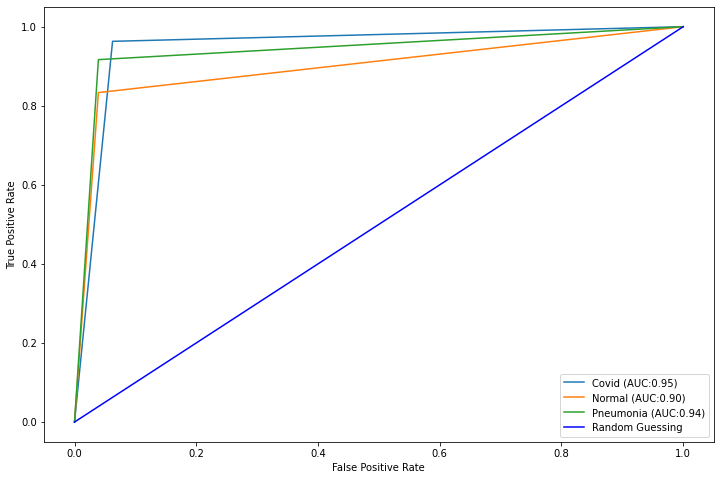

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score

target= Classes

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
  lb = LabelBinarizer()
  lb.fit(y_test)
  y_test = lb.transform(y_test)
  y_pred = lb.transform(y_pred)
  
  for (idx, c_label) in enumerate(target):
    fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)' % (c_label, auc(fpr, tpr)))
  
  c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
  return roc_auc_score(y_test, y_pred, average=average)

print('ROC AUC score:', multiclass_roc_auc_score(Y_test, Y_pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()